# Runtime measurements for leaf-level photosynthesis

Here we compare the original Fortran code (from CLM) with multiple Python versions, generated mostly by ChatGPT and partly by a human. See the accompanying paper for more context. 

In [1]:
from importlib.machinery import ModuleSpec
import os
import time
import importlib.util
import pandas as pd
import plotly.graph_objects as go

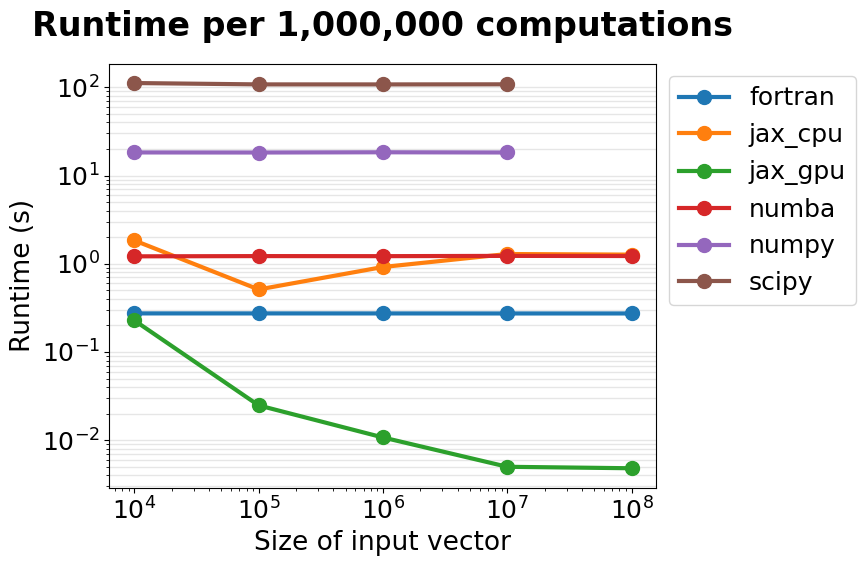

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.rcParams.update({'font.size': 18, 'lines.linewidth': 3, 'lines.markersize': 10})


# List of folders
folders = ['fortran', 'jax_cpu', 'jax_gpu', 'numba', 'numpy', 'scipy']

# Initialize a figure for plotting
plt.figure(figsize=(9, 6))

# Loop over each folder to load and plot the data

for folder in folders:
    filepath = os.path.join('runtime_scripts', folder, 'runtime.txt')
    if os.path.exists(filepath):
        # Load CSV data
        data = pd.read_csv(filepath)
        
        # Extract grid cells and runtime
        grid_cells = data.iloc[:, 0]
        runtime = data.iloc[:, 1] * (1000000 / grid_cells)
        
        # Plot the data
        plt.plot(grid_cells, runtime, label=folder, marker='o')

# Set log scale for y-axis
plt.yscale('log')
plt.xscale('log')

# Adding title, labels, and legend with larger font size
plt.title('Runtime per 1,000,000 computations', fontsize=24, 
          fontweight='bold', 
          pad=20)
plt.xlabel('Size of input vector', fontsize=19)
plt.ylabel('Runtime (s)', fontsize=19)
plt.legend(fontsize=18, loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot with enhanced grid and layout
plt.grid(True, which="both", ls="-", c='0.9', axis='y', linewidth=1)
plt.tight_layout()
plt.show()


/var/folders/f5/2hq9r_jx0q16hr0r_1xp9st80000gp/T/ipykernel_13368/2651416036.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


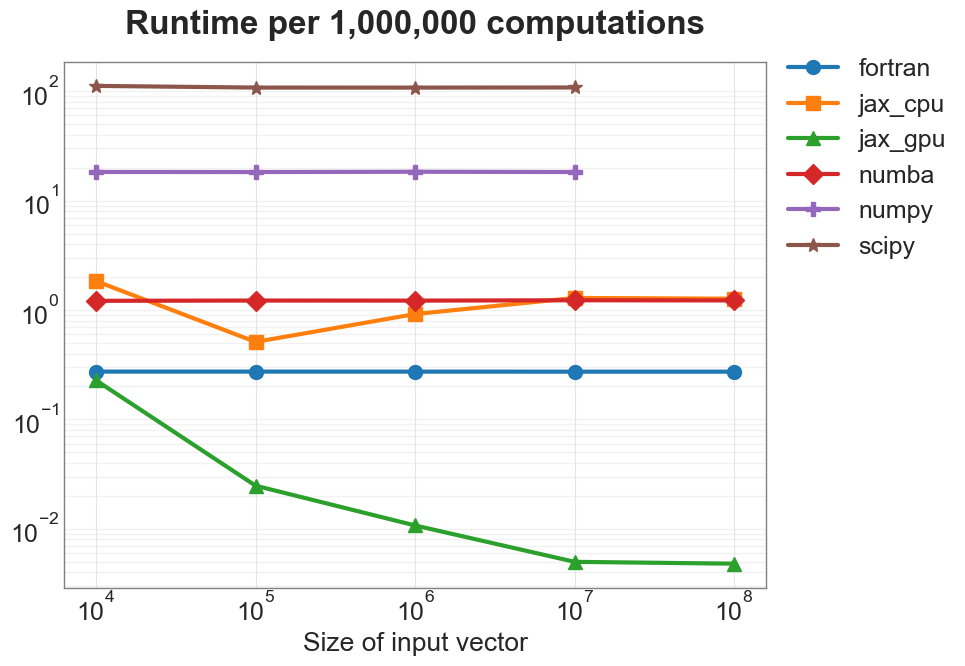

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Use a predefined style
plt.style.use('seaborn-whitegrid')

# Adjust the global parameters for aesthetics
plt.rcParams.update({
    'font.size': 18, 
    'lines.linewidth': 3, 
    'lines.markersize': 10,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.edgecolor': 'grey',
    'axes.grid': True,
    'grid.alpha': 0.53
})

# List of folders and corresponding markers for better distinction
folders = ['fortran', 'jax_cpu', 'jax_gpu', 'numba', 'numpy', 'scipy']
markers = ['o', 's', '^', 'D', 'P', '*']

# Initialize a figure for plotting
plt.figure(figsize=(10, 7))

# Loop over each folder to load and plot the data
for folder, marker in zip(folders, markers):
    filepath = os.path.join('runtime_scripts', folder, 'runtime.txt')
    if os.path.exists(filepath):
        # Load CSV data
        data = pd.read_csv(filepath)
        
        # Extract grid cells and runtime
        grid_cells = data.iloc[:, 0]
        runtime = data.iloc[:, 1] * (1000000 / grid_cells)
        
        # Plot the data
        plt.plot(grid_cells, runtime, label=folder, marker=marker, linestyle='-')

# Set log scale for both axes
plt.yscale('log')
plt.xscale('log')

# Adding title, labels, and legend with larger font size
plt.title('Runtime per 1,000,000 computations', fontsize=24, 
          fontweight='bold', 
          pad=20)

plt.xlabel('Size of input vector', fontsize=19)
# plt.ylabel('Runtime', fontsize=19)
plt.legend(fontsize=18, loc='upper left', bbox_to_anchor=(1, 1.05))

# Show the plot with enhanced grid and layout
plt.grid(True, which="both", ls="-", c='0.9', axis='y', linewidth=1)
plt.tight_layout()
plt.show()


/var/folders/f5/2hq9r_jx0q16hr0r_1xp9st80000gp/T/ipykernel_13368/263653560.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


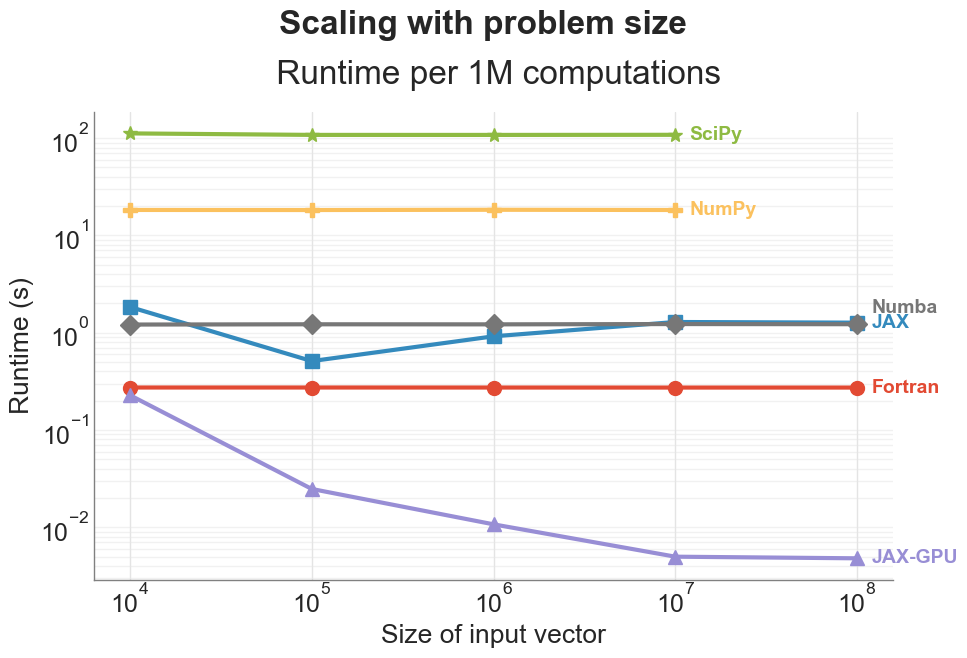

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Use a predefined style
plt.style.use('seaborn-whitegrid')

# Adjust the global parameters for aesthetics
plt.rcParams.update({
    'font.size': 18, 
    'lines.linewidth': 3, 
    'lines.markersize': 10,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.edgecolor': 'grey',
    'axes.grid': True,
    'grid.alpha': 0.53
})

# List of folders and corresponding markers for better distinction
folders = ['fortran', 'jax_cpu', 'jax_gpu', 'numba', 'numpy', 'scipy']

labels = {
    'fortran': 'Fortran',
    'jax_cpu': 'JAX',
    'jax_gpu': 'JAX-GPU',
    'numba': 'Numba',
    'numpy': 'NumPy',
    'scipy': "SciPy"
}

markers = ['o', 's', '^', 'D', 'P', '*']

# Initialize a figure for plotting
fig, ax = plt.subplots(figsize=(10, 7))

label_positions = []


# Remove top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Loop over each folder to load and plot the data
for folder, marker in zip(folders, markers):
    filepath = os.path.join('runtime_scripts', folder, 'runtime.txt')
    if os.path.exists(filepath):
        # Load CSV data
        data = pd.read_csv(filepath)
        
        # Extract grid cells and runtime
        grid_cells = data.iloc[:, 0]
        runtime = data.iloc[:, 1] * (1000000 / grid_cells)
        
        # Plot the data
        line, = ax.plot(grid_cells, runtime, marker=marker, linestyle='-')
        line_color = line.get_color()        
        
        # Determine label y-position
        label_y_position = runtime.iloc[-1]
        label_x_position = grid_cells.iloc[-1] * 1.20  # Adding 5% padding for x
        
        # Adjust label position if it overlaps with previous labels
        while any(abs(label_y_position - pos) < runtime.max()*0.4 for pos in label_positions):
            label_y_position *= 1.05
        
        label_positions.append(label_y_position)
        
        # Label the lines with adjusted position, bold font, and line color
        ax.text(label_x_position, label_y_position, labels[folder], 
                fontsize=14, fontweight='bold', 
                verticalalignment='center', color=line_color)

# Set log scale for both axes
ax.set_yscale('log')
ax.set_xscale('log')
plt.grid(True, which="both", ls="-", c='0.9', axis='y', linewidth=1)

# Adding title and labels with larger font size
plt.suptitle('Scaling with problem size', fontsize=24, fontweight='bold', y=0.95)
plt.title(' Runtime per 1M computations', fontsize=24, pad=20)

ax.set_xlabel('Size of input vector', fontsize=19)
ax.set_ylabel('Runtime (s)', fontsize=19)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


/var/folders/f5/2hq9r_jx0q16hr0r_1xp9st80000gp/T/ipykernel_13368/3380903450.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


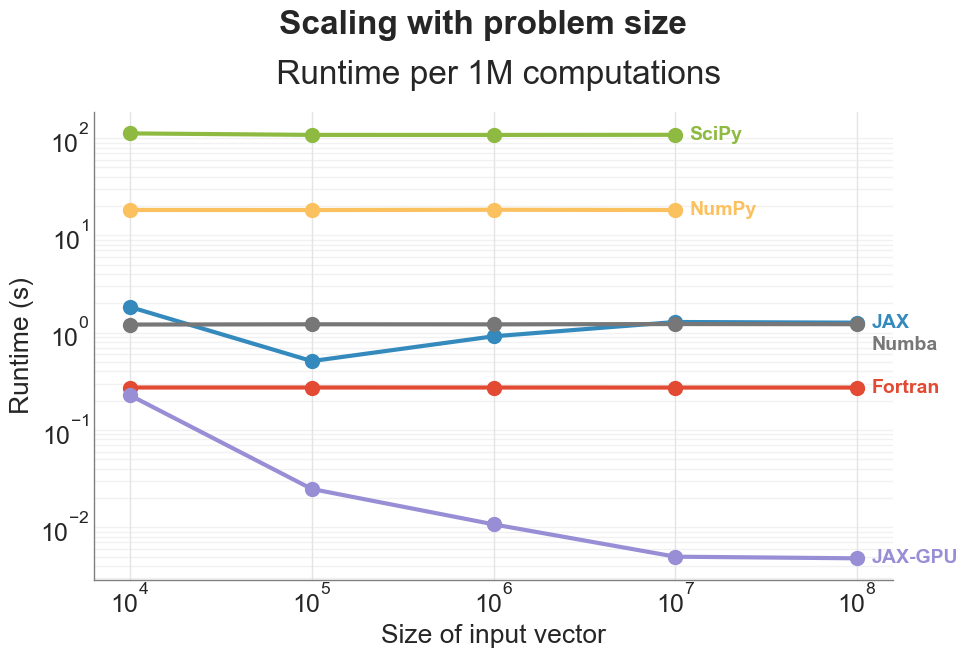

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Use a predefined style
plt.style.use('seaborn-whitegrid')

# Adjust the global parameters for aesthetics
plt.rcParams.update({
    'font.size': 18, 
    'lines.linewidth': 3, 
    'lines.markersize': 10,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.edgecolor': 'grey',
    'axes.grid': True,
    'grid.alpha': 0.53
})

# List of folders and corresponding markers for better distinction
folders = ['fortran', 'jax_cpu', 'jax_gpu', 'numba', 'numpy', 'scipy']

labels = {
    'fortran': 'Fortran',
    'jax_cpu': 'JAX',
    'jax_gpu': 'JAX-GPU',
    'numba': 'Numba',
    'numpy': 'NumPy',
    'scipy': "SciPy"
}

# Initialize a figure for plotting
fig, ax = plt.subplots(figsize=(10, 7))

label_positions = []

# Remove top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Loop over each folder to load and plot the data
for folder in folders:
    filepath = os.path.join('runtime_scripts', folder, 'runtime.txt')
    if os.path.exists(filepath):
        # Load CSV data
        data = pd.read_csv(filepath)
        
        # Extract grid cells and runtime
        grid_cells = data.iloc[:, 0]
        runtime = data.iloc[:, 1] * (1000000 / grid_cells)
        
        # Plot the data
        line, = ax.plot(grid_cells, runtime, marker='o', linestyle='-')
        line_color = line.get_color()        
        
        # Determine label y-position
        label_y_position = runtime.iloc[-1]
        label_x_position = grid_cells.iloc[-1] * 1.20  # Adding 5% padding for x
        
        # Adjust label position if it overlaps with previous labels
        for pos in label_positions:
            while abs(label_y_position - pos) < runtime.max() * 0.4:
                # Determine if we need to move up or down
                if label_y_position >= pos:
                    label_y_position *= 1.05
                else:
                    label_y_position /= 1.05
        
        label_positions.append(label_y_position)
        
        # Label the lines with adjusted position, bold font, and line color
        ax.text(label_x_position, label_y_position, labels[folder], 
                fontsize=14, fontweight='bold', 
                verticalalignment='center', color=line_color)



# Set log scale for both axes
ax.set_yscale('log')
ax.set_xscale('log')
plt.grid(True, which="both", ls="-", c='0.9', axis='y', linewidth=1)

# Adding title and labels with larger font size
plt.suptitle('Scaling with problem size', fontsize=24, fontweight='bold', y=0.95)
plt.title(' Runtime per 1M computations', fontsize=24, pad=20)

ax.set_xlabel('Size of input vector', fontsize=19)
ax.set_ylabel('Runtime (s)', fontsize=19)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
